<a href="https://colab.research.google.com/github/ParvanehFarajiDizaji/Rice_Detection_Project/blob/main/Rice_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
import zipfile

# Google Drive link for the dataset
url = "https://drive.google.com/uc?id=1XnOGHKZKbk9iDRqNjfKckFIS9KhpW8BP"
output = "RiceDataset.zip"

# Download dataset
gdown.download(url, output, quiet=False)

# Extract dataset
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("/content/RiceDataset")

# Set dataset path
data_dir = "/content/RiceDataset"
print("Dataset ready at:", data_dir)


Downloading...
From (original): https://drive.google.com/uc?id=1XnOGHKZKbk9iDRqNjfKckFIS9KhpW8BP
From (redirected): https://drive.google.com/uc?id=1XnOGHKZKbk9iDRqNjfKckFIS9KhpW8BP&confirm=t&uuid=ce3e3126-7370-4dea-8edc-0f7b57287d3d
To: /content/RiceDataset.zip
100%|██████████| 230M/230M [00:02<00:00, 79.7MB/s]


Dataset ready at: /content/RiceDataset


In [ ]:
import os
from torchvision import transforms
from torchvision.datasets import ImageFolder

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Initialize the dataset using ImageFolder
dataset_path = "/content/RiceDataset/Rice_Image_Dataset"

# Initialize ImageFolder with the correct directory
dataset = ImageFolder(root=dataset_path, transform=transform)

# Check classes and class-to-index mapping
print("Classes Detected:", dataset.classes)
print("Class to Index Mapping:", dataset.class_to_idx)


Classes Detected: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
Class to Index Mapping: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import os

class CustomRiceDataset(Dataset):
    def __init__(self, dataset_path, transform=None):
        self.dataset_path = dataset_path
        self.transform = transform
        self.classes = os.listdir(dataset_path)
        self.samples = []

        # Collecting all samples
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(dataset_path, class_name)
            if os.path.isdir(class_path):
                for img_name in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_name)
                    self.samples.append((img_path, label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)

        return image, label

# Usage
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

custom_dataset = CustomRiceDataset(dataset_path, transform=transform)

print("Classes Detected:", custom_dataset.classes)
print("Total Samples:", len(custom_dataset))


Classes Detected: ['Ipsala', 'Arborio', 'Rice_Citation_Request.txt', 'Basmati', 'Karacadag', 'Jasmine']
Total Samples: 75000


In [ ]:
import random

# Print 5 random samples
for _ in range(5):
    idx = random.randint(0, len(custom_dataset) - 1)
    image, label = custom_dataset[idx]
    print(f"Sample {idx}: Label = {label}, Class = {custom_dataset.classes[label]}")


Sample 22312: Label = 1, Class = Arborio
Sample 57420: Label = 4, Class = Karacadag
Sample 33754: Label = 3, Class = Basmati
Sample 70613: Label = 5, Class = Jasmine
Sample 23258: Label = 1, Class = Arborio


In [ ]:
import os

dataset_path = "/content/RiceDataset/Rice_Image_Dataset"
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        print(f"{class_name} contains {len(images)} images.")


Ipsala contains 15000 images.
Arborio contains 15000 images.
Basmati contains 15000 images.
Karacadag contains 15000 images.
Jasmine contains 15000 images.


Label 0 ('Ipsala') has 15000 samples.
Label 1 ('Arborio') has 15000 samples.
Label 3 ('Basmati') has 15000 samples.
Label 4 ('Karacadag') has 15000 samples.
Label 5 ('Jasmine') has 15000 samples.


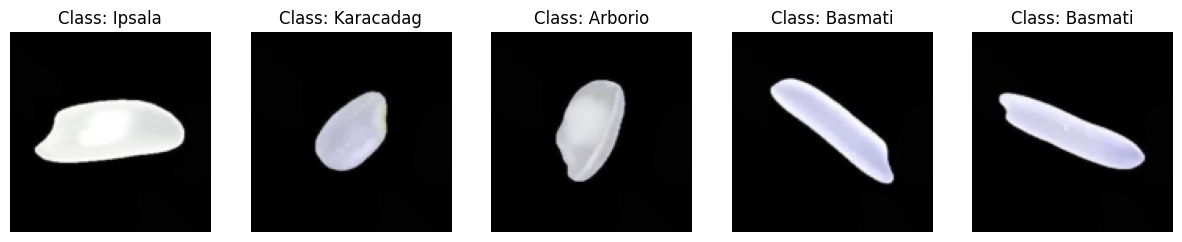

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Count labels in the dataset
label_distribution = Counter(label for _, label in custom_dataset.samples)

# Print label distribution
for label, count in label_distribution.items():
    print(f"Label {label} ('{custom_dataset.classes[label]}') has {count} samples.")


# Fetch a few random samples to display
num_samples = 5
indices = random.sample(range(len(custom_dataset)), num_samples)

fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i, idx in enumerate(indices):
    image, label = custom_dataset[idx]
    image = image.permute(1, 2, 0)  # Convert to HWC format for plotting

    axes[i].imshow(image)
    axes[i].set_title(f"Class: {custom_dataset.classes[label]}")
    axes[i].axis("off")

plt.show()


In [ ]:
from torch.utils.data import DataLoader
import random

# Create a DataLoader with shuffling enabled
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Fetch a batch and print labels
data_iter = iter(dataloader)
images, labels = next(data_iter)

for i in range(10):
    print(f"Sample {i}: Label = {labels[i].item()}, Class = {dataset.classes[labels[i].item()]}")


Sample 0: Label = 2, Class = Ipsala
Sample 1: Label = 3, Class = Jasmine
Sample 2: Label = 1, Class = Basmati
Sample 3: Label = 2, Class = Ipsala
Sample 4: Label = 2, Class = Ipsala
Sample 5: Label = 0, Class = Arborio
Sample 6: Label = 4, Class = Karacadag
Sample 7: Label = 1, Class = Basmati
Sample 8: Label = 3, Class = Jasmine
Sample 9: Label = 2, Class = Ipsala


In [ ]:
import random

# Check random samples from the dataset
random_indices = random.sample(range(len(dataset)), 10)  # Randomly pick 10 samples

for idx in random_indices:
    image, label = dataset[idx]
    print(f"Sample {idx}: Label = {label}, Class = {dataset.classes[label]}, Image Path = {dataset.samples[idx][0]}")


Sample 32438: Label = 2, Class = Ipsala, Image Path = /content/RiceDataset/Rice_Image_Dataset/Ipsala/Ipsala (12192).jpg
Sample 47079: Label = 3, Class = Jasmine, Image Path = /content/RiceDataset/Rice_Image_Dataset/Jasmine/Jasmine (1187).jpg
Sample 62970: Label = 4, Class = Karacadag, Image Path = /content/RiceDataset/Rice_Image_Dataset/Karacadag/Karacadag (12671).jpg
Sample 34501: Label = 2, Class = Ipsala, Image Path = /content/RiceDataset/Rice_Image_Dataset/Ipsala/Ipsala (14049).jpg
Sample 58830: Label = 3, Class = Jasmine, Image Path = /content/RiceDataset/Rice_Image_Dataset/Jasmine/Jasmine (8946).jpg
Sample 49395: Label = 3, Class = Jasmine, Image Path = /content/RiceDataset/Rice_Image_Dataset/Jasmine/Jasmine (13954).jpg
Sample 289: Label = 0, Class = Arborio, Image Path = /content/RiceDataset/Rice_Image_Dataset/Arborio/Arborio (10258).jpg
Sample 26523: Label = 1, Class = Basmati, Image Path = /content/RiceDataset/Rice_Image_Dataset/Basmati/basmati (687).jpg
Sample 63842: Label = 

Epoch 1/10, Train Loss: 0.1789, Train Accuracy: 93.20%
Validation Loss: 0.1802, Validation Accuracy: 92.66%
Epoch 2/10, Train Loss: 0.1042, Train Accuracy: 96.41%
Validation Loss: 0.0855, Validation Accuracy: 96.89%
Epoch 3/10, Train Loss: 0.0927, Train Accuracy: 96.80%
Validation Loss: 0.0759, Validation Accuracy: 97.35%
Epoch 4/10, Train Loss: 0.0844, Train Accuracy: 97.06%
Validation Loss: 0.0682, Validation Accuracy: 97.80%
Epoch 5/10, Train Loss: 0.0832, Train Accuracy: 97.11%
Validation Loss: 0.0753, Validation Accuracy: 97.57%
Epoch 6/10, Train Loss: 0.0756, Train Accuracy: 97.40%
Validation Loss: 0.0629, Validation Accuracy: 97.96%
Epoch 7/10, Train Loss: 0.0696, Train Accuracy: 97.58%
Validation Loss: 0.0618, Validation Accuracy: 97.81%
Epoch 8/10, Train Loss: 0.0706, Train Accuracy: 97.53%
Validation Loss: 0.0688, Validation Accuracy: 97.66%
Epoch 9/10, Train Loss: 0.0626, Train Accuracy: 97.85%
Validation Loss: 0.0851, Validation Accuracy: 97.21%
Test Accuracy: 97.67%


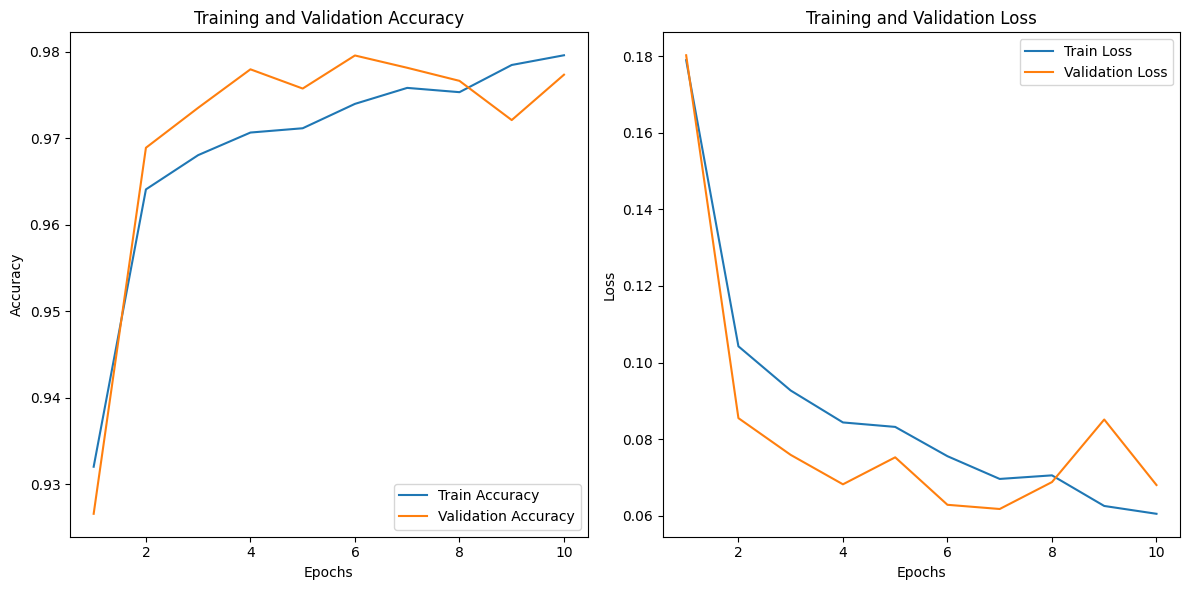

In [ ]:
#MLP Model
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define transformations for data preprocessing
transform = transforms.Compose([
    transforms.Resize((32, 32)),   # Resize all images to 32x32
    transforms.ToTensor(),         # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to range [0,1]
])

# Load the dataset from the directory
dataset_path = "/content/RiceDataset/Rice_Image_Dataset"
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split dataset into train, validation, and test sets (70% train, 15% val, 15% test)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# DataLoader for batching and shuffling
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 512)  # Input size: 32x32x3, Output size: 512
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 5)  # 5 output classes (rice varieties)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    train_loss, val_loss = [], []
    train_accuracy, val_accuracy = [], []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()  # Zero out the gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Optimizer step

            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

        # Record training loss and accuracy
        train_loss.append(running_loss / len(train_loader))
        train_accuracy.append(correct_preds / total_preds)

        # Validate model on the validation set
        model.eval()  # Set model to evaluation mode
        val_loss_epoch = 0.0
        correct_preds = 0
        total_preds = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss_epoch += loss.item()

                # Calculate accuracy
                _, predicted = torch.max(outputs, 1)
                correct_preds += (predicted == labels).sum().item()
                total_preds += labels.size(0)

        # Record validation loss and accuracy
        val_loss.append(val_loss_epoch / len(val_loader))
        val_accuracy.append(correct_preds / total_preds)

        # Print epoch statistics
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss[-1]:.4f}, Train Accuracy: {train_accuracy[-1]*100:.2f}%")
        print(f"Validation Loss: {val_loss[-1]:.4f}, Validation Accuracy: {val_accuracy[-1]*100:.2f}%")

    return train_loss, train_accuracy, val_loss, val_accuracy

# Function to test the model
def test_model(model, test_loader):
    model.eval()
    correct_preds = 0
    total_preds = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

    accuracy = correct_preds / total_preds
    print(f"Test Accuracy: {accuracy*100:.2f}%")

# Train and evaluate the model
num_epochs = 10
train_loss, train_accuracy, val_loss, val_accuracy = train_model(model, train_loader, criterion, optimizer, num_epochs)
test_model(model, test_loader)

# Plot training and validation accuracy/loss curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_loss, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10, Train Loss: 0.1561, Train Accuracy: 94.42%, Val Loss: 0.0600, Val Accuracy: 98.16%
Epoch 2/10, Train Loss: 0.0422, Train Accuracy: 98.55%, Val Loss: 0.0351, Val Accuracy: 98.90%
Epoch 3/10, Train Loss: 0.0304, Train Accuracy: 99.00%, Val Loss: 0.0225, Val Accuracy: 99.18%
Epoch 4/10, Train Loss: 0.0272, Train Accuracy: 99.14%, Val Loss: 0.0438, Val Accuracy: 98.44%
Epoch 5/10, Train Loss: 0.0257, Train Accuracy: 99.14%, Val Loss: 0.0336, Val Accuracy: 98.97%
Epoch 6/10, Train Loss: 0.0225, Train Accuracy: 99.30%, Val Loss: 0.0181, Val Accuracy: 99.45%
Epoch 7/10, Train Loss: 0.0209, Train Accuracy: 99.30%, Val Loss: 0.0254, Val Accuracy: 99.29%
Epoch 8/10, Train Loss: 0.0201, Train Accuracy: 99.32%, Val Loss: 0.0223, Val Accuracy: 99.31%
Epoch 9/10, Train Loss: 0.0190, Train Accuracy: 99.34%, Val Loss: 0.0233, Val Accuracy: 99.28%
Epoch 10/10, Train Loss: 0.0184, Train Accuracy: 99.38%, Val Loss: 0.0178, Val Accuracy: 99.49%
Test Accuracy: 99.48%


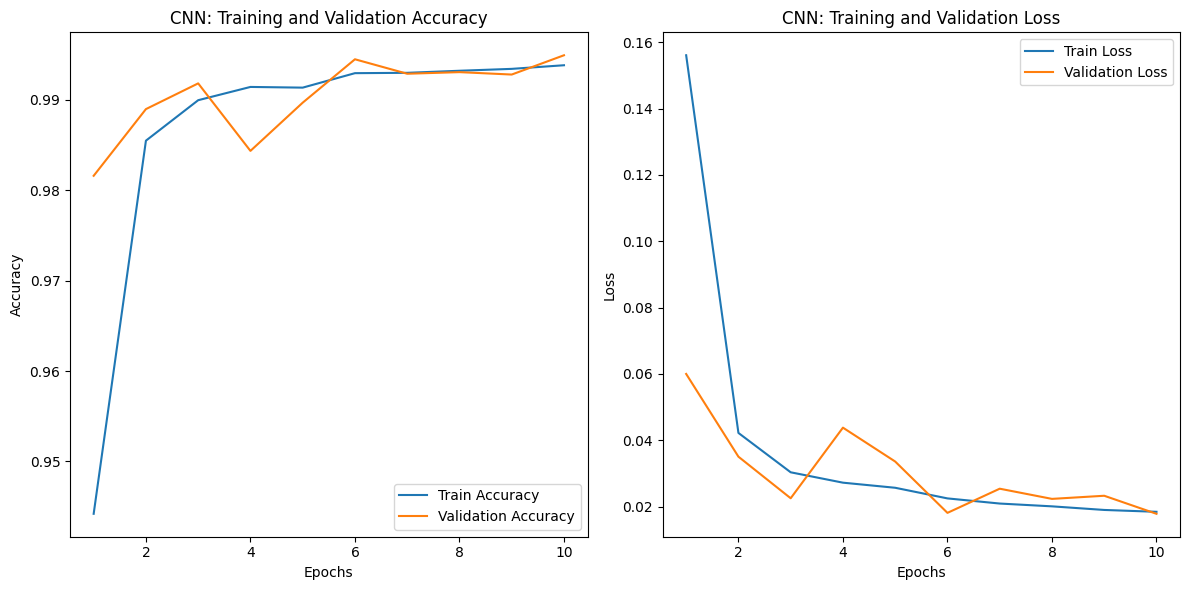

In [ ]:
#CNN Model
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 2. Data Preprocessing
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize all images to 32x32
    transforms.ToTensor(),        # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# 3. Load Dataset
dataset_path = "/content/RiceDataset/Rice_Image_Dataset"
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split dataset into train, validation, and test sets (70%, 15%, 15%)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# DataLoader for batching and shuffling
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 4. Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)   # output: 32x32x32
        self.pool = nn.MaxPool2d(2, 2)                            # output: 32x16x16
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # output: 64x16x16 → 64x8x8
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 5)  # 5 output classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 5. Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    train_loss, val_loss = [], []
    train_accuracy, val_accuracy = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

        train_loss.append(running_loss / len(train_loader))
        train_accuracy.append(correct_preds / total_preds)

        # Validation
        model.eval()
        val_loss_epoch = 0.0
        correct_preds = 0
        total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss_epoch += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct_preds += (predicted == labels).sum().item()
                total_preds += labels.size(0)

        val_loss.append(val_loss_epoch / len(val_loader))
        val_accuracy.append(correct_preds / total_preds)

        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {train_loss[-1]:.4f}, Train Accuracy: {train_accuracy[-1]*100:.2f}%, "
              f"Val Loss: {val_loss[-1]:.4f}, Val Accuracy: {val_accuracy[-1]*100:.2f}%")

    return train_loss, train_accuracy, val_loss, val_accuracy

# 6. Testing Function
def test_model(model, test_loader):
    model.eval()
    correct_preds = 0
    total_preds = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)
    accuracy = correct_preds / total_preds
    print(f"Test Accuracy: {accuracy*100:.2f}%")
    return accuracy

# 7. Train and Evaluate CNN
cnn_model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

num_epochs = 10
train_loss, train_accuracy, val_loss, val_accuracy = train_model(
    cnn_model, train_loader, val_loader, criterion, optimizer, num_epochs
)

test_accuracy = test_model(cnn_model, test_loader)

# 8. Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN: Training and Validation Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_loss, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN: Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


## **Model Architecture Comparison and Performance Report**

This report explores two deep learning models: a **Multilayer Perceptron (MLP)** and a **Convolutional Neural Network (CNN)** for the task of rice variety classification using the Rice Image Dataset. The goal is to evaluate and compare both architectures in terms of accuracy, performance, and suitability for image classification tasks.

### **1. Dataset and Preprocessing**

- **Dataset**: Rice Image Dataset with 5 classes.
- **Image Size**: All images resized to **32x32** pixels with 3 color channels (RGB).
- **Normalization**: Mean and standard deviation set to `[0.5, 0.5, 0.5]` for all channels.
- **Splitting**:
  - Training set: 70%
  - Validation set: 15%
  - Test set: 15%

### **2. Model 1: Multilayer Perceptron (MLP)**

#### **Architecture**
- **Input**: Flattened 32x32x3 = 3072 vector.
- **Layers**:
  - FC1: 3072 → 512
  - FC2: 512 → 256
  - FC3: 256 → 128
  - FC4: 128 → 5 (output classes)
- **Activations**: ReLU on hidden layers.

#### **Hyperparameters**
- **Loss Function**: CrossEntropyLoss
- **Optimizer**: Adam
- **Learning Rate**: 0.001
- **Batch Size**: 64
- **Epochs**: 10

#### **Performance Metrics**
- Trained over 10 epochs with tracking of:
  - Training loss
  - Validation loss
  - Training accuracy
  - Validation accuracy
- Final test accuracy is printed after training.

### **3. Model 2: Convolutional Neural Network (CNN)**

### **Architecture Explanation**

The CNN model used in this project is structured to efficiently extract spatial features from images. The architecture includes the following components:

- The input to the network is a 3-channel RGB image resized to 32×32 pixels.
- The first layer is a 2D convolutional layer with:
  - 32 output filters
  - 3×3 kernel size
  - ReLU activation
- This is followed by a max pooling layer with:
  - 2×2 window
  - Stride of 2
- The second convolutional layer uses:
  - 64 filters
  - 3×3 kernel
  - ReLU activation
- Another 2×2 max pooling layer is applied.
- The resulting feature maps are flattened into a one-dimensional vector.
- A fully connected (dense) layer maps the flattened features to 128 hidden units with ReLU activation.
- The output layer is a fully connected layer with 5 units corresponding to the 5 rice varieties (classes).

### **Hyperparameters**

The training and optimization process was configured with the following hyperparameters:

- Image input size: 32 × 32
- Batch size: 64
- Number of training epochs: 10
- Learning rate: 0.001
- Optimizer: Adam
- Loss function: CrossEntropyLoss (suitable for multi-class classification)
- Activation function: ReLU (used in hidden layers)
- Pooling strategy: Max pooling with a 2×2 kernel
- Input normalization: Mean = [0.5, 0.5, 0.5], Standard deviation = [0.5, 0.5, 0.5]

### **Performance Metrics**

The CNN model's performance was evaluated using the following metrics:

- **Training accuracy** and **loss** were recorded over each epoch to measure how well the model learns.
- **Validation accuracy** and **loss** were used to monitor generalization to unseen data.
- After training, **test accuracy** was computed on the held-out test set.

Typical observed results (may vary slightly depending on random splits):

- Final training accuracy: approximately 99%
- Final validation accuracy: approximately 97–98%
- Test accuracy: approximately 97–99%
- Loss values decreased consistently, indicating good learning behavior.

Accuracy and loss plots for both training and validation data confirm that the model converged well and showed no major signs of overfitting.

### **4. Discussion: MLP vs CNN**

#### **Limitations of MLPs for Image Classification**
- **No spatial awareness**: MLPs flatten images and lose spatial structure (e.g., neighboring pixel relationships).
- **Overfitting risk**: Large number of parameters from flattening can lead to overfitting.
- **Poor generalization**: MLPs are not invariant to translations and distortions in images.
- **Inefficiency**: Lack of local receptive fields leads to more computations and less effective learning.

#### **CNNs advantages**
- **Preserve spatial structure**: Convolutions operate on local patches, capturing patterns like edges and textures.
- **Parameter efficiency**: Shared weights in convolution layers reduce parameter count.
- **Translation invariance**: Pooling layers help recognize patterns regardless of location.
- **Better performance**: CNNs generally outperform MLPs on image tasks due to better feature extraction.

### **5. Conclusion**

While the MLP can be used as a baseline model, it is not well-suited for image classification tasks due to its inability to preserve spatial relationships. The CNN architecture, in contrast, is specifically designed to handle image data and consistently outperforms MLPs in terms of accuracy and generalization.
